Problem 1

In [1]:
import numpy as np
import matplotlib.pyplot as plt

number_of_classes_M = 2
number_of_features_F = 5
initial_weights = np.random.uniform(low=-1, high=1,
                                     size = (number_of_classes_M, number_of_features_F))

In [2]:
N = 1000
learning_rate = 0.00005
iteration = 50

#training data points
X = np.random.normal(loc=0, scale=1,size=(N, number_of_features_F))
y = np.random.choice([0,1], size=(N,1))

#true labels
t = np.zeros((N, number_of_classes_M))
t[np.arange(N), y.T] = 1

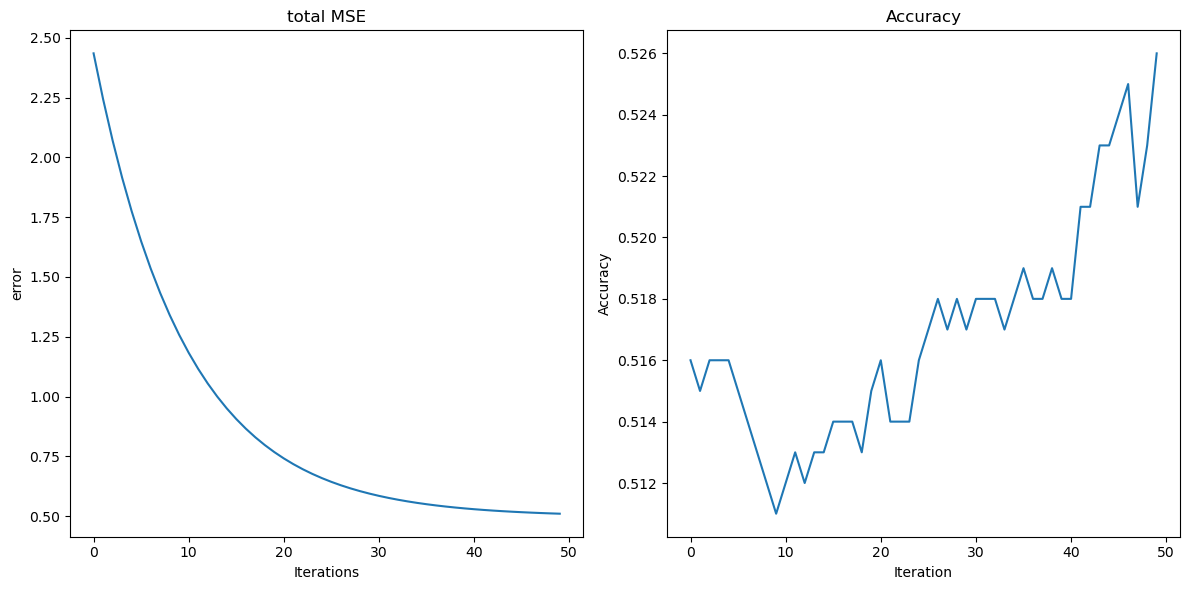

In [3]:
errors = []
accuracy = []

for _ in range(iteration):
    Y = np.dot(X, initial_weights.T)

    E = 0.5 * np.sum((Y-t )**2, axis = 1)
    errors.append(np.mean(E))

    accuracy.append(np.mean(np.argmax(Y, axis=1) == y.T))

    for k in range(number_of_classes_M):
        for j in range(number_of_features_F):
            initial_weights[k, j] -= learning_rate * np.sum((Y[:, k] - t[:, k])*X[:, j])


plt.figure(figsize=(12, 6))
plt.subplot(1,2,1)
plt.plot(errors)
plt.title('total MSE')
plt.xlabel('Iterations')
plt.ylabel('error')

plt.subplot(1, 2, 2)
plt.plot(accuracy)
plt.title('Accuracy')
plt.xlabel('Iteration')
plt.ylabel('Accuracy')
plt.tight_layout()
 

Problem 2

In [4]:
import numpy as np
import tensorflow as tf
from tensorflow.keras import layers
number_of_feature = 13
number_of_units_in_hidden_layer = 100
#### load the BOSTON regression dataset
(x_train, y_train), (x_test, y_test) =  tf.keras.datasets.boston_housing.load_data(path="boston_housing.npz", test_split=0.2, seed=113)
#### pre-process the data
x_train -= np.mean(x_train)
x_train /= np.std(x_train)
x_test -= np.mean(x_test)
x_test /= np.std(x_test)

NN_regression_model = tf.keras.Sequential()
hidden_layer_1 = layers.Dense(units=number_of_units_in_hidden_layer, activation='relu', input_shape=(13,)) # define layer
NN_regression_model.add(hidden_layer_1) # add layer
hidden_layer_2 = layers.Dense(units=number_of_units_in_hidden_layer, activation='relu') # define layer
NN_regression_model.add(hidden_layer_2) # add layer
output_layer = layers.Dense(units=1, activation=None) # define layer (units = 1 for regression)
NN_regression_model.add(output_layer) # add layer


After epoch 0: MSE on training data = 66.52621459960938 ; MSE of testing data = 65.59587097167969
After epoch 10: MSE on training data = 52.961238861083984 ; MSE of testing data = 54.16292953491211
After epoch 20: MSE on training data = 46.8863525390625 ; MSE of testing data = 51.02983474731445
After epoch 30: MSE on training data = 38.11772155761719 ; MSE of testing data = 42.42388153076172
After epoch 40: MSE on training data = 31.481903076171875 ; MSE of testing data = 34.54118728637695
After epoch 50: MSE on training data = 25.993227005004883 ; MSE of testing data = 32.00672149658203
After epoch 60: MSE on training data = 28.69835662841797 ; MSE of testing data = 34.86005783081055
After epoch 70: MSE on training data = 20.88614273071289 ; MSE of testing data = 33.450599670410156
After epoch 80: MSE on training data = 17.239761352539062 ; MSE of testing data = 28.56471824645996
After epoch 90: MSE on training data = 16.660608291625977 ; MSE of testing data = 28.445903778076172
After

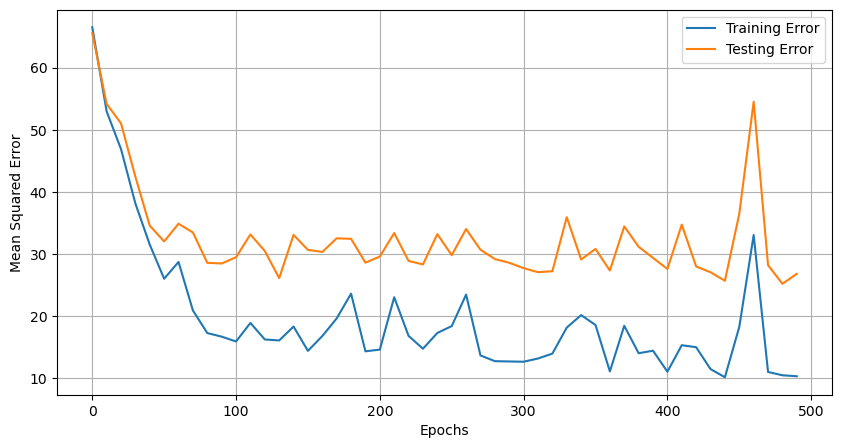

In [5]:

# Define your optimizer
optimizer = tf.keras.optimizers.Adam(learning_rate=0.001)

# Compile the model
NN_regression_model.compile(optimizer=optimizer, loss='mse')

train_errors = []
test_errors = []

for epoch in range(500):
    # Train for one epoch
    NN_regression_model.fit(x_train, y_train, epochs=1, batch_size = 1, verbose=0)
    
    # Evaluate and store errors every 10 epochs
    if epoch % 10 == 0:
        train_error_mse = NN_regression_model.evaluate(x_train, y_train, verbose=0)
        test_error_mse = NN_regression_model.evaluate(x_test, y_test, verbose=0)
        train_errors.append(train_error_mse)
        test_errors.append(test_error_mse)
        print(f"After epoch {epoch}: MSE on training data = {train_error_mse} ; MSE of testing data = {test_error_mse}")

# Plot
plt.figure(figsize=(10, 5))
plt.plot(range(0, 500, 10), train_errors, label='Training Error')
plt.plot(range(0, 500, 10), test_errors, label='Testing Error')
plt.xlabel('Epochs')
plt.ylabel('Mean Squared Error')
plt.legend()
plt.grid(True)
plt.show()

Problem 3

In [6]:
number_of_features = 28*28
#### load the MNIST dataset
(x_train, y_train),(x_test, y_test)=tf.keras.datasets.mnist.load_data()
x_train,x_test=x_train.astype('float32'),x_test.astype('float32')
# normalize and vectorize the data
x_train /= 255
x_test /= 255
x_train,x_test= x_train.reshape(60000,784,1),x_test.reshape(10000,784,1)
# one-hot encoding (OHE)
y_train_OHE = []
for label in y_train:
    all_zero_temp = 10*[0]
    all_zero_temp[label] = 1.0
    y_train_OHE.append(all_zero_temp)
y_train_OHE = np.asarray(y_train_OHE)
y_test_OHE = []
for label in y_test:
    all_zero_temp = 10*[0]
    all_zero_temp[label] = 1.0
    y_test_OHE.append(all_zero_temp)
y_test_OHE = np.asarray(y_test_OHE)


In [7]:
NN_classification_model = tf.keras.Sequential()
hidden_layer_1 = layers.Dense(units=number_of_units_in_hidden_layer, activation='relu', input_shape=(number_of_features,)) # define layer
NN_classification_model.add(hidden_layer_1) # add layer
hidden_layer_2 = layers.Dense(units=number_of_units_in_hidden_layer, activation='relu') # define layer
NN_classification_model.add(hidden_layer_2) # add layer
output_layer = layers.Dense(units=10, activation='softmax') # define layer (units = 10 for classification)
NN_classification_model.add(output_layer) # add layer

# Compile the model
NN_classification_model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model
NN_classification_model.fit(x_train, y_train_OHE, epochs=100, batch_size=100)

# Evaluate the model
train_accuracy = NN_classification_model.evaluate(x_train, y_train_OHE)[1]
test_accuracy = NN_classification_model.evaluate(x_test, y_test_OHE)[1]

print("Accuracy on training data = {} ; Accuracy on testing data = {}".format(train_accuracy, test_accuracy))

Epoch 1/100
600/600 [==============================] - 3s 3ms/step - loss: 0.3194 - accuracy: 0.9094
Epoch 2/100
600/600 [==============================] - 2s 3ms/step - loss: 0.1288 - accuracy: 0.9621
Epoch 3/100
600/600 [==============================] - 2s 3ms/step - loss: 0.0904 - accuracy: 0.9726
Epoch 4/100
600/600 [==============================] - 2s 3ms/step - loss: 0.0703 - accuracy: 0.9787
Epoch 5/100
600/600 [==============================] - 2s 3ms/step - loss: 0.0567 - accuracy: 0.9829
Epoch 6/100
600/600 [==============================] - 2s 3ms/step - loss: 0.0452 - accuracy: 0.9858
Epoch 7/100
600/600 [==============================] - 2s 3ms/step - loss: 0.0377 - accuracy: 0.9883
Epoch 8/100
600/600 [==============================] - 2s 3ms/step - loss: 0.0318 - accuracy: 0.9901
Epoch 9/100
600/600 [==============================] - 2s 3ms/step - loss: 0.0282 - accuracy: 0.9908
Epoch 10/100
600/600 [==============================] - 2s 3ms/step - loss: 0.0239 - accura

Problem 4

In [8]:
number_of_features = 28*28
number_of_units_in_hidden_layer = 100
#### load the MNIST dataset
(x_train, y_train), (x_test, y_test)=tf.keras.datasets.fashion_mnist.load_data()
#### building the input vector from the 28x28 pixels
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
# normalizing the data
x_train /= 255
x_test /= 255
# one-hot encoding (OHE)
y_train_OHE = []
for label in y_train:
    all_zero_temp = 10*[0]
    all_zero_temp[label] = 1.0
    y_train_OHE.append(all_zero_temp)
y_train_OHE = np.asarray(y_train_OHE)
y_test_OHE = []
for label in y_test:
    all_zero_temp = 10*[0]
    all_zero_temp[label] = 1.0
    y_test_OHE.append(all_zero_temp)
y_test_OHE = np.asarray(y_test_OHE)
#### Construct the NN classification model
NN_classification_model = tf.keras.Sequential()
# define conv layer
Conv2d_layer = layers.Conv2D(128, kernel_size=(3,3), strides=(1,1),
padding='valid', activation='relu', input_shape=(28,28,1))
NN_classification_model.add(Conv2d_layer)# add layer
# define max pooling layer
MaxPool_layer = layers.MaxPool2D(pool_size=(4,4))
NN_classification_model.add(MaxPool_layer)#add layer
# define flatten layer (reshaping from tensor to vector)
flatten_layer = layers.Flatten()
NN_classification_model.add(flatten_layer) #add flatten layer

In [9]:
hidden_layer_1 = layers.Dense(units=number_of_units_in_hidden_layer, activation='relu')
NN_classification_model.add(hidden_layer_1)
hidden_layer_2 = layers.Dense(units=number_of_units_in_hidden_layer, activation='relu')
NN_classification_model.add(hidden_layer_2)

output_layer = layers.Dense(units=10, activation='softmax')
NN_classification_model.add(output_layer)

NN_classification_model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

NN_classification_model.fit(x_train, y_train_OHE, epochs=100, batch_size=100)

train_accuracy = NN_classification_model.evaluate(x_train, y_train_OHE)[1]
test_accuracy = NN_classification_model.evaluate(x_test, y_test_OHE)[1]

print("Accuracy on training data = {} ; Accuracy on testing data = {}".format(train_accuracy, test_accuracy))

Epoch 1/100


600/600 [==============================] - 27s 44ms/step - loss: 0.5083 - accuracy: 0.8167
Epoch 2/100
600/600 [==============================] - 23s 37ms/step - loss: 0.3351 - accuracy: 0.8791
Epoch 3/100
600/600 [==============================] - 25s 41ms/step - loss: 0.2935 - accuracy: 0.8927
Epoch 4/100
600/600 [==============================] - 25s 42ms/step - loss: 0.2661 - accuracy: 0.9018
Epoch 5/100
600/600 [==============================] - 28s 47ms/step - loss: 0.2447 - accuracy: 0.9100
Epoch 6/100
600/600 [==============================] - 29s 48ms/step - loss: 0.2282 - accuracy: 0.9140
Epoch 7/100
600/600 [==============================] - 25s 42ms/step - loss: 0.2127 - accuracy: 0.9202
Epoch 8/100
600/600 [==============================] - 24s 40ms/step - loss: 0.1969 - accuracy: 0.9272
Epoch 9/100
600/600 [==============================] - 24s 40ms/step - loss: 0.1872 - accuracy: 0.9308
Epoch 10/100
600/600 [==============================] - 25s 41ms/step - loss: 0.1770 